### Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Analysis

#### 1. Total Population by Facility

In [41]:
# importing cleaned data
df = pd.read_csv('../cleaned_ice_detention.csv',index_col=0)
df.head(10)

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXANDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,1990-01-01
5,ALLEN PARISH PUBLIC SAFETY COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,ATLANTA US PEN,ATLANTA,GA,17.341317,3.610778,3.053892,2.724551,1990-01-01
7,BAKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,1990-01-01
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,2024-12-12


In [42]:
# create the Total Population column
df['Total Population'] = df['Level A'] + df['Level B'] + df['Level C'] + df['Level D']

# Get the top 10 facilities by total population
top_10 = df.nlargest(10, 'Total Population')
print("\nTop 10 facilities by total population:")
top_10[['Name', 'City', 'State', 'Total Population']]


Top 10 facilities by total population:


,Name,City,State,Total Population
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,2153.874252
119,SOUTH TEXAS ICE PROCESSING CENTER,PEARSALL,TX,1662.131736
122,STEWART DETENTION CENTER,LUMPKIN,GA,1637.844311
132,WINN CORRECTIONAL CENTER,WINNFIELD,LA,1509.383233
93,OTAY MESA DETENTION CENTER,SAN DIEGO,CA,1362.640719
41,ELOY FEDERAL CONTRACT FACILITY,ELOY,AZ,1327.724551
83,MOSHANNON VALLEY PROCESSING CENTER,PHILIPSBURG,PA,1246.047904
82,MONTGOMERY ICE PROCESSING CENTER,CONROE,TX,1227.227545
18,CENTRAL LOUISIANA ICE PROCESSING CENTER CLIPC,JENA,LA,1184.131736
31,DENVER CONTRACT DETENTION FACILITY,AURORA,CO,1146.101796


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46112\3791347705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Population', y='Name', data=top_10,


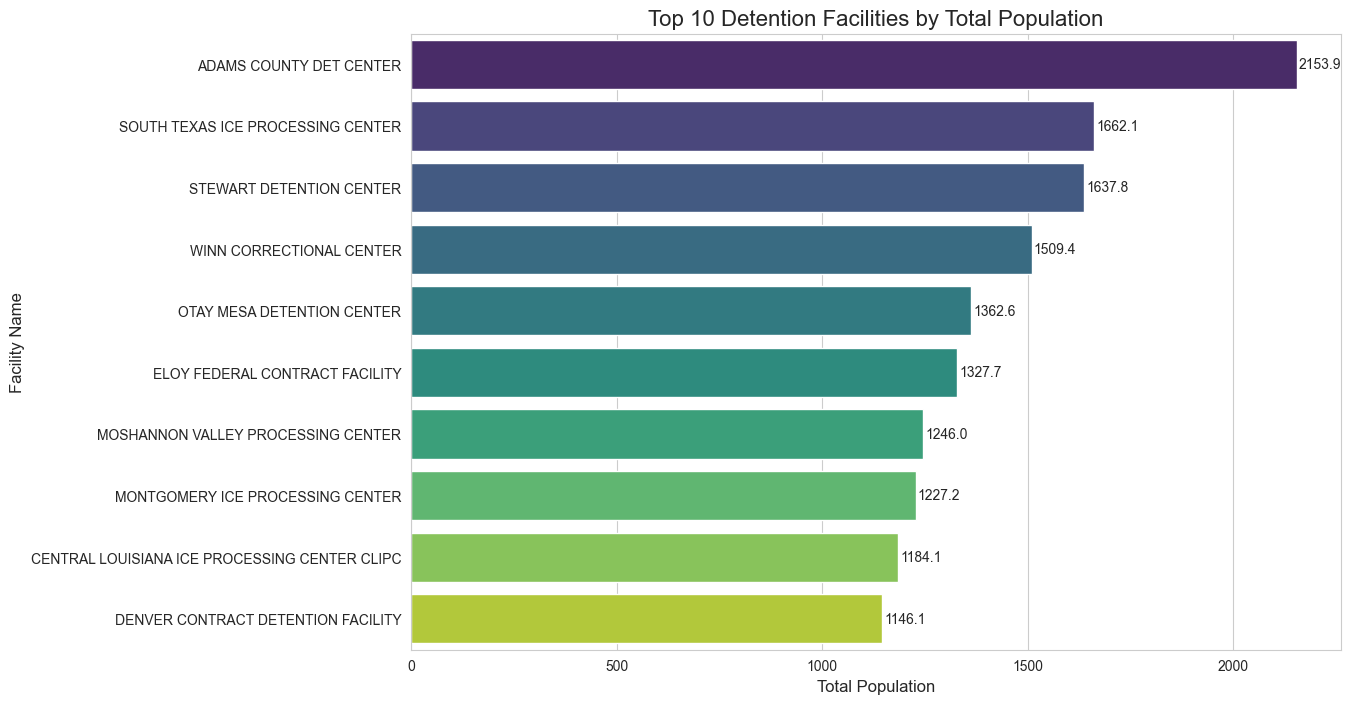

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create the figure and axes directly
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Total Population', y='Name', data=top_10, 
            palette='viridis', orient='h', ax=ax)

# Add labels and title
ax.set_title('Top 10 Detention Facilities by Total Population', fontsize=16)
ax.set_xlabel('Total Population', fontsize=12)
ax.set_ylabel('Facility Name', fontsize=12)

# Add the values at the end of each bar
for i, v in enumerate(top_10['Total Population']):
    ax.text(v + 5, i, f"{v:.1f}", va='center')




In [44]:
# Save the figure
fig.tight_layout()
fig.savefig('../top_10_detention_facilities.png', dpi=300, bbox_inches='tight')

In [45]:
# Summary of the data frame
df.describe()

,Level A,Level B,Level C,Level D,Total Population
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,186.810760,40.864469,45.272478,34.404947,307.352655
std,320.650168,79.973686,85.286985,65.432270,439.045640
min,0.000000,0.000000,0.000000,0.000000,1.239557
25%,2.125749,1.613772,1.221557,0.685629,7.320359
50%,17.017964,8.371257,6.880240,4.940120,75.526946
75%,222.790419,39.631737,38.997006,35.452096,506.547904
max,1876.461078,561.425150,542.275449,402.059880,2153.874252


#### 2. Total Population by state

In [46]:
# Group by 'State' and sum the 'Total Population'
state_population = df.groupby('State')['Total Population'].sum().reset_index()

# Sort in descending order and take top 10
top_10_states = state_population.sort_values(by='Total Population', ascending=False).head(10)
top_10_states

,State,Total Population
37,TX,12202.682696
14,LA,7026.580838
3,CA,3082.359281
6,GA,2551.850299
2,AZ,2309.712575
21,MS,2170.125749
5,FL,1690.095808
32,PA,1528.802395
27,NM,1374.580838
4,CO,1146.101796


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46112\9383564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Population', y='State', data=top_10_states, palette='magma', orient='h', ax=ax)


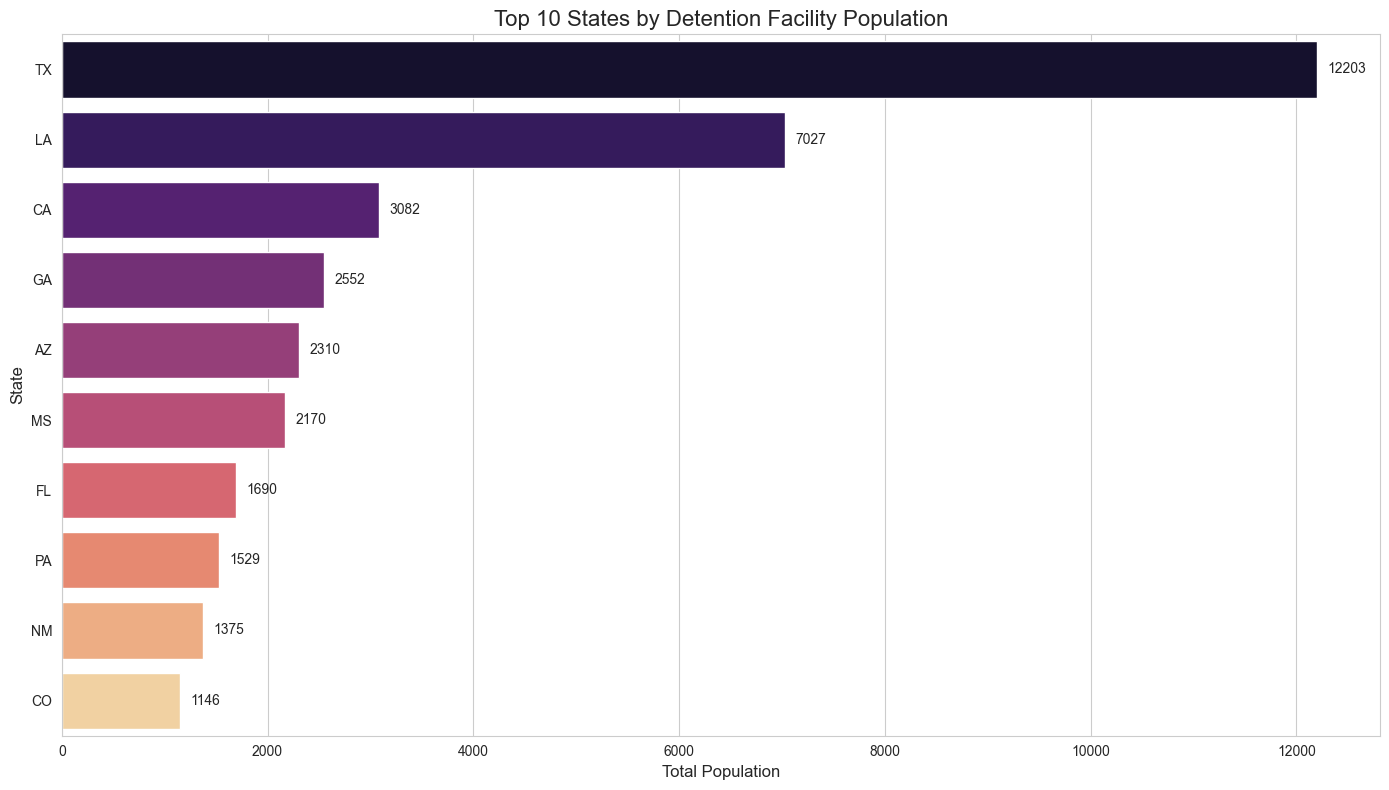

In [47]:
# Set style
sns.set_style("whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(14, 8))  # Larger image
sns.barplot(x='Total Population', y='State', data=top_10_states, palette='magma', orient='h', ax=ax)

# Titles and labels
ax.set_title('Top 10 States by Detention Facility Population', fontsize=16)
ax.set_xlabel('Total Population', fontsize=12)
ax.set_ylabel('State', fontsize=12)

# Add value labels to bars
for i, v in enumerate(top_10_states['Total Population']):
    ax.text(v + 100, i, f"{v:.0f}", va='center')

# Save the figure
fig.tight_layout()
fig.savefig('../top_10_states_population.png', dpi=300, bbox_inches='tight')
plt.show()